# 1. Линейная регрессия и классификация


Импорт:

In [1]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

## 1.1 Simple Linear Regression
Simple Linear Regression - Модель парной регрессии - регрессия с одной переменной

Подгружаем датасет:
* **SalePrice** - The property's sale price in dollars. Это целевая переменная (зависимая переменная), которую мы будем пытаться предсказать
* **GrLivArea** - Above grade (ground) living area square feet - Это независимая переменная (предиктор)


In [2]:
data = pd.read_csv('train.csv', index_col = 0, usecols=['Id', 'GrLivArea', 'SalePrice'])

Давайте посмотрим на наши данные:

In [3]:
data.head()

,GrLivArea,SalePrice
Id,,
1,1710,208500
2,1262,181500
3,1786,223500
4,1717,140000
5,2198,250000


In [4]:
data.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


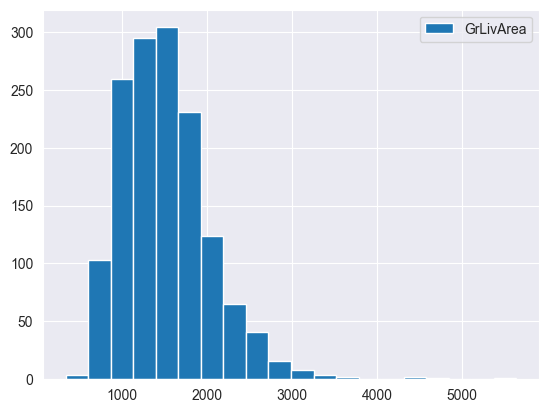

In [5]:
data.GrLivArea.hist(bins=20, label='GrLivArea')
plt.legend()
plt.show()

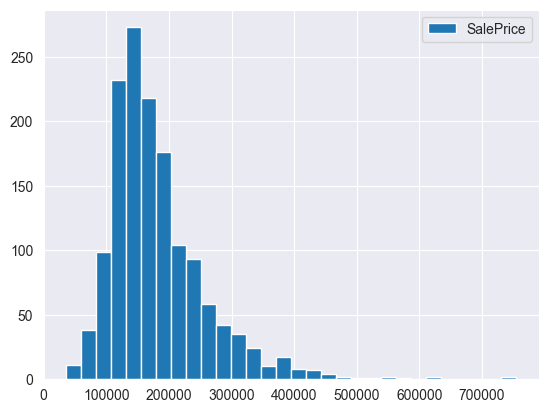

In [6]:
data.SalePrice.hist(bins=30, label='SalePrice')
plt.legend()
plt.show()

In [7]:
data.SalePrice.quantile(0.95)

np.float64(326099.9999999999)

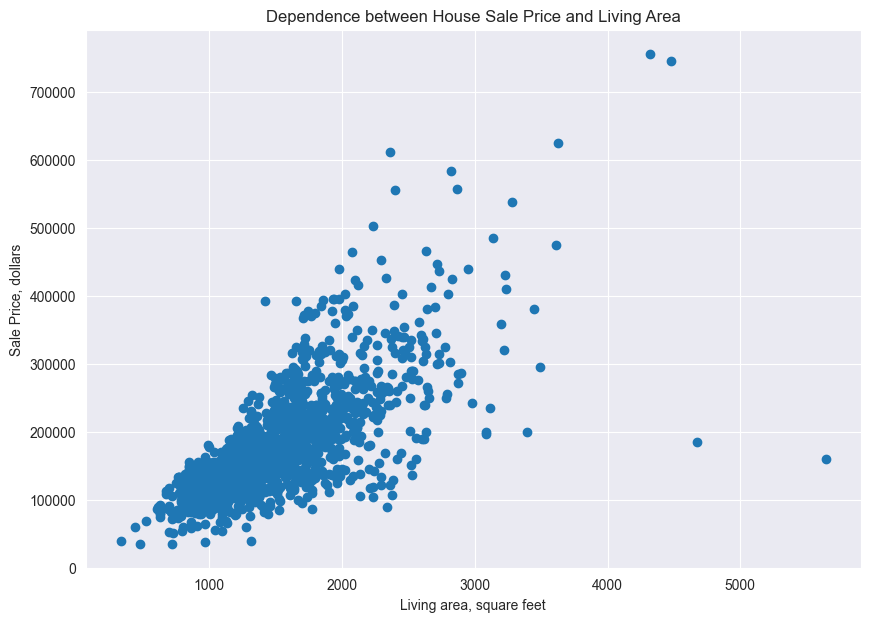

In [8]:
#set figsize of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice)
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
#show the plot
plt.show()

### Как смоделировать эту зависимость?

### Построение модели

* Y = SalePrice - целевая, зависимая переменная
* X = GrLivArea - предиктор, независимая переменная

**Модель**

Мы хотим найти прямую, которая наилучшим образом отображает зависимость между Sale Price и Living Area

$Y = a + bX + \epsilon$


In [9]:
X = data.GrLivArea
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [10]:
#plot the summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.502     
Dependent Variable: SalePrice        AIC:                36073.7610
Date:               2024-10-26 20:53 BIC:                36084.3334
No. Observations:   1460             Log-Likelihood:     -18035.   
Df Model:           1                F-statistic:        1471.     
Df Residuals:       1458             Prob (F-statistic): 4.52e-223 
R-squared:          0.502            Scale:              3.1442e+09
-------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025    0.975]  
-------------------------------------------------------------------
const      18569.0259 4480.7545  4.1442 0.0000 9779.6119 27358.4399
GrLivArea    107.1304    2.7936 38.3482 0.0000  101.6504   112.6103
-------------------------------------------------------------------
Omnibus:             261.166       Durbin-Watson:          2.025   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       3432.287
Skew:                0.410         Prob(JB):               0.000   
Kurtosis:            10.467        Condition No.:          4897    
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

### Что значат все эти статистики?

* **const** - найденное значение для а
* **GrLivArea** - найденное значение для b

таким образом, наша модель **Y = 18569.0259 + 107.1304 * X**

**Тестирование гипотез и *p-value***

$H_0$: coeff = 0 - нулевая гипотеза

$H_1$: coeff $\neq$ 0 - альтернативная гипотеза

* Если *p-value* $\leq$ alpha, тогда мы **МОЖЕМ** отклонить нулевую гипотезу и соответствующий коэффициент зовется **значимым**
* Если *p-value* > alpha, то мы **НЕ МОЖЕМ** отклонить нулевую гипотезу и соответствующий коэффициент зовется **незначимым**
    
    
**Как подобрать подходящее значения для alpha?**

Значения alpha могут быть... : 0.01, 0.05, 0.1 ...

Наиболее популярный выбор alpha = 0.05

#### Как хорошо найденная функция описывает реальную зависимость?
**Y = 18569.0259 + 107.1304 * X**

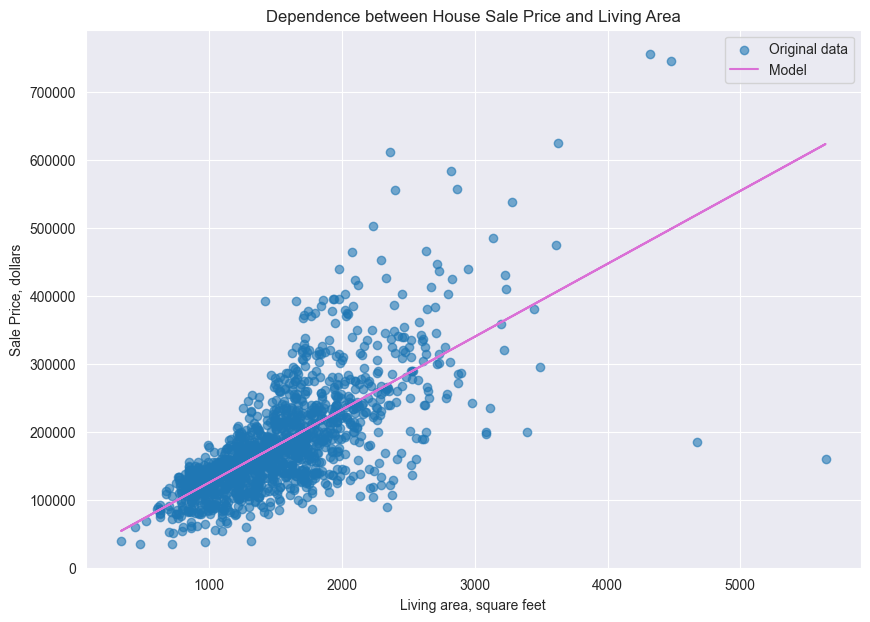

In [11]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice, alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(data.GrLivArea.values, 18569.0259 + 107.1304 * data.GrLivArea.values, color = 'orchid', label='Model')
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
plt.legend()
#show the plot
plt.show()

#### Оценка подгонки регрессии и $R^2$

$R^2$ - это **коэффициент детерминации**, одна из наиболее популярных метрик для задачи регрессии, в том числе, для линейной регрессии

В случае линейной регрессии, $R^2$ определяется следующим образом:

* $y_i$ - наблюдаемые значения целевой переменной
* $\hat{y_i}$ - предсказываемые моделью значения целевой переменной
* $\overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$ - среднее по наблюдаемым значениям целевой переменной
* $SS_{tot} = \sum_{i}(y_i - \overline{y})^2$ - общая сумма квадратов (total sum of squares, TSS)
* $SS_{reg} = \sum_{i}(\hat{y_i} - \overline{y})^2$ - explained sum of squares, ESS
* $SS_{res} = \sum_{i}(y_i - \hat{y_i})^2 = \sum_{i}residual_i^2$ - residual sum of squares, RSS

$R^2 = \frac{SS_{reg}}{SS_{tot}} = 1 - \frac{SS_{res}}{SS_{tot}}$ - доля объясненной дисперсии (ratio of the explained variance)

$R^2$ лежит в интервале [0, 1]

В нашей модели $R^2 = 0.502$, т.е. только половина от дисперсии объяснена

**Note:** $R^2$ нестабилен, т.к. увеличивается вместе с добавлением новых данных, поэтому лучше смотреть на $R^2_{adjusted}$

### Попробуем сделать лучше?

Давайте возьмем логарифмы от X и Y. Тогда модель будет выглядеть так: **$ln(Y) = a + b*ln(X) + \epsilon$**

In [12]:
X = data.GrLivArea
Y = data.SalePrice
X=np.log(X)
Y=np.log(Y)
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [13]:
#plot the summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.533    
Dependent Variable: SalePrice        AIC:                354.1941 
Date:               2024-10-26 20:53 BIC:                364.7664 
No. Observations:   1460             Log-Likelihood:     -175.10  
Df Model:           1                F-statistic:        1666.    
Df Residuals:       1458             Prob (F-statistic): 1.60e-243
R-squared:          0.533            Scale:              0.074523 
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const         5.6681     0.1559   36.3601   0.0000   5.3623   5.9739
GrLivArea     0.8745     0.0214   40.8151   0.0000   0.8325   0.9166
------------------------------------------------------------------
Omnibus:             111.954       Durbin-Watson:          2.022  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       184.755
Skew:                -0.565        Prob(JB):               0.000  
Kurtosis:            4.327         Condition No.:          162    
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

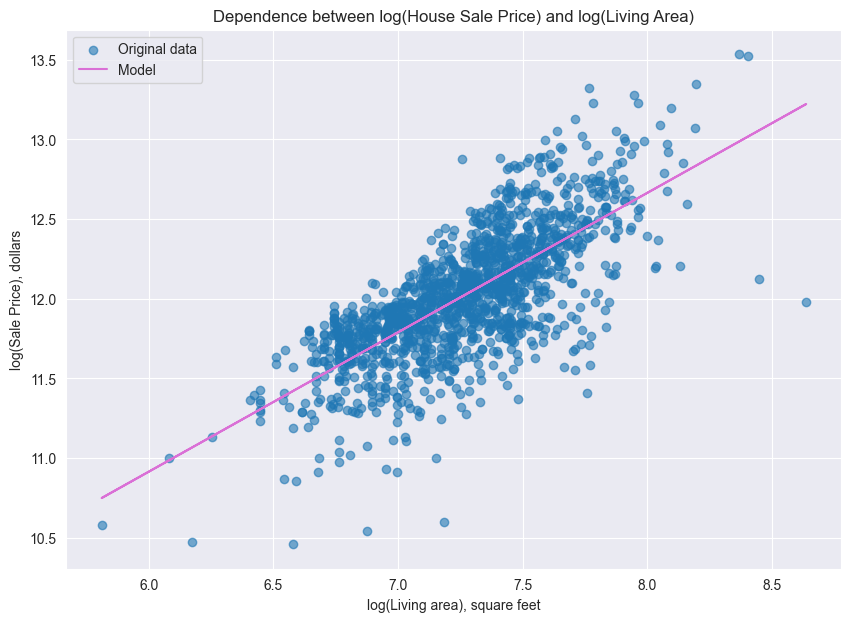

In [14]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(np.log(data.GrLivArea), np.log(data.SalePrice), alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(np.log(data.GrLivArea.values), 5.6681 + 0.8745 * np.log(data.GrLivArea.values), color = 'orchid', label='Model')
#text for x axis
plt.xlabel('log(Living area), square feet')
#text for y axis
plt.ylabel('log(Sale Price), dollars')
#text for the plot title
plt.title('Dependence between log(House Sale Price) and log(Living Area)')
plt.legend()
#show the plot
plt.show()

## 1.2 Multiple Linear Regression (Модель множественной линейной регрессии)

In [15]:
cols=['Id', 'MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [16]:
data = pd.read_csv('train.csv', index_col=0, usecols=cols)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


Проверка на пропуски в данных (nan):

In [17]:
data.isna().sum().sum()

np.int64(0)

### Определяем модель

In [18]:
X = data.drop('SalePrice', axis=1)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

Вычисляем некоторые статистические параметры:

In [19]:
#together with the intercept
k = X.shape[1]
#total number of observations
n = X.shape[0]
#degrees of freedom for the model:
df_model = k - 1
#degrees of freedom of the error:
df_error = n - k
print(' the number of paraters to estimate: {} \n total number of observations: {} \n degrees of freedom of the model: {} \n degrees of freedom of the errors: {}'\
      .format(k, n, df_model, df_error))

 the number of paraters to estimate: 31 
 total number of observations: 1460 
 degrees of freedom of the model: 30 
 degrees of freedom of the errors: 1429


Посчитаем ранг матрицы наблюдений Х:

In [20]:
np.linalg.matrix_rank(X)

np.int64(30)

In [21]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.804     
Dependent Variable:      SalePrice            AIC:                    34737.9309
Date:                    2024-10-26 20:53     BIC:                    34896.5166
No. Observations:        1460                 Log-Likelihood:         -17339.   
Df Model:                29                   F-statistic:            207.6     
Df Residuals:            1430                 Prob (F-statistic):     0.00      
R-squared:               0.808                Scale:                  1.2357e+09
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const         608246.1995 1428003.7488  0.4259 0.6702 -2192960.6498 3409453.0488
MSSubClass      -161.5055      26.4469 -6.1068 0.0000     -213.3845    -109.6266
LotArea            0.3868       0.1016  3.8079 0.0001        0.1875       0.5860
OverallQual    18012.7658    1194.9364 15.0742 0.0000    15668.7495   20356.7821
OverallCond     4425.5378    1031.1020  4.2920 0.0000     2402.9031    6448.1725
YearBuilt        349.4880      61.2239  5.7084 0.0000      229.3896     469.5863
YearRemodAdd     140.9941      66.3557  2.1248 0.0338       10.8292     271.1590
BsmtUnfSF         -9.7412       3.1432 -3.0991 0.0020      -15.9070      -3.5754
TotalBsmtSF       20.5078       4.5849  4.4729 0.0000       11.5140      29.5016
1stFlrSF          18.9417       6.1645  3.0727 0.0022        6.8492      31.0341
2ndFlrSF          19.5079       5.7011  3.4218 0.0006        8.3244      30.6914
LowQualFinSF      -6.7807      14.8869 -0.4555 0.6488      -35.9831      22.4218
GrLivArea         31.6689       5.7075  5.5486 0.0000       20.4729      42.8650
BsmtFullBath    8400.0052    2512.7996  3.3429 0.0009     3470.8365   13329.1738
FullBath        3414.1786    2838.1391  1.2030 0.2292    -2153.1840    8981.5413
HalfBath       -1549.1048    2690.0026 -0.5759 0.5648    -6825.8793    3727.6697
BedroomAbvGr  -10546.9569    1704.6005 -6.1873 0.0000   -13890.7426   -7203.1712
KitchenAbvGr  -12589.7919    5254.5163 -2.3960 0.0167   -22897.1787   -2282.4051
TotRmsAbvGrd    5095.3485    1250.1490  4.0758 0.0000     2643.0258    7547.6713
Fireplaces      3707.1220    1784.0235  2.0780 0.0379      207.5382    7206.7058
GarageCars     10562.3784    2884.3767  3.6619 0.0003     4904.3150   16220.4418
GarageArea         2.1462       9.7916  0.2192 0.8265      -17.0613      21.3537
WoodDeckSF        25.7208       8.0357  3.2008 0.0014        9.9578      41.4838
OpenPorchSF       -6.2873      15.3029 -0.4109 0.6812      -36.3058      23.7312
EnclosedPorch      6.6916      17.0190  0.3932 0.6942      -26.6932      40.0765
3SsnPorch         21.6727      31.6870  0.6840 0.4941      -40.4854      83.8308
ScreenPorch       55.1441      17.3306  3.1819 0.0015       21.1479      89.1403
PoolArea         -42.4124      23.8035 -1.7818 0.0750      -89.1059       4.2810
MiscVal           -0.8946       1.8753 -0.4770 0.6334       -4.5731       2.7840
MoSold          -111.5227     348.4163 -0.3201 0.7490     -794.9846     571.9391
YrSold          -817.2240     709.7266 -1.1515 0.2497    -2209.4410     574.9931
--------------------------------------------------------------------------------
Omnibus:               540.774        Durbin-Watson:           1.961            
Prob(Omnibus):         0.000          Jarque-Bera (JB):        95836.983        
Skew:                  -0.553         Prob(JB):                0.000            
Kurtosis:              42.676         Condition No.:           13129423541445026
================================================================================
Notes:


**Объяснение таблички с результатами:**

* $R^2 = 0.808$
* $R^2_{adj} = 0.804$
* Log-Likelihood = -1733 - Значение функции правдоподобия в оптимальной точке
* AIC = 34738 - Akaike information criterion, используется для выбора наилучшей модели. Лучше та модель, у которой AIC меньше
* BIC = 34897 - Bayesian information criterion, цель та же, что и у AIC
* F-statistic = 208

**F-test, тест на значимость модели в целом**:

$H_{0}$ : Коэффициенты при всех признаках, кроме константы, одновременно равны нулю

$H_{1}$ : Не равны нулю, т.е. признаки добавляют информации в модель

$F = \frac{R^2/(k-1)}{(1-R^2)/(n-k)}$,

где $k$ - кол-во переменных (вместе с константой), $n$ - кол-во наблюдений


Если посчитанное значение статистики F-value больше, чем табличное значение, то мы можем отклонить нулевую гипотезу $H_{0}$

* Prob(F-statistic) = 0.0 - P-value for F-test
* Df model - degrees of freedom of the model
* Df Residuals - degrees of freedom of the errors

**Note:** значения Df отличаются (!). Верные значения посчитаны выше. В этой специфической реализации OLS, DF_model считается как ранг матрицы X, который равен 29

* Scale - squared standard error (SSE) регрессии

* Durbin-Watson = 1.96; DW - тест на автокорреляцию ошибок. Значения DW всегда лежат между 0 и 4. Если DW << 2, то присутствует положительная корреляция, если DW >> 2, то отрицательная корреляция


**Note:** Не все коэффициенты значимы. Что делать? Существует несколько методов (a.k.a. Feature engineering):

* **Исключение по P-value:**

Строим модель, используя полный набор признаков. Затем, исключаем незначимые признаки итеративно, начиная с того, у которого P-value больше всех

* **Forward elimination:**

Строим все возможные регрессионные модели с одним признаком и выбираем наилучший. Затем, строим все возможные модели с наилучшим предиктором и еще одним (все возможные двойки). Продолжаем добавлять по одному признаку. Останавливаемся, когда качество модели перестает улучшаться или начинает ухудшаться.

* **Backward elimination:**

Строим регрессионную модель на всех признаках. Затем, удаляем по одному признаку итеративно (удаляется тот, чье удаление приводит к наибольшему улучшению качества модели). Останавливаемся, когда удаление признаков начинает приводить к ухудшению качества модели.

### **Задача 1**: Найдите коллинеарные признаки и оставьте только один из них

In [41]:
correlation_matrix = data.corr()

threshold = 0.9
collinear_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            collinear_features.add(colname)

data_reduced = data.drop(columns=collinear_features)
print("Остальные признаки после удаления коллинеарных:", data_reduced.columns.tolist())


Остальные признаки после удаления коллинеарных: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


### **Задача 2**: Реализовать исключение признаков по P-value

**Подсказки**:
*   используйте циклы
*   мониторьте целевую метрику (R^2 adjusted) и P-values соответствующих коэффициентов
*   константа должна быть включена в модель
     
    
Незначимый коэффициент при переменной в одной модели может стать значимым в другой и наоборот

Две модели с разными признаками считаются разными моделями (!)

In [38]:
cols2 = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',\
         'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',\
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',\
 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

alpha = 0.05
X = data_reduced.drop('SalePrice', axis=1)
Y = data_reduced['SalePrice']
X = sm.add_constant(X)

while True:
    model = sm.OLS(Y, X).fit()
    p_values = model.pvalues
    if (p_values > alpha).any():
          X = X.drop(p_values.idxmax(), axis=1)
    else:
        break

print("Остальные признаки после исключения по P-value:", X.columns.tolist())

## **2. Logistic Regression**

Подгружаем датасет:

In [24]:
X, Y = sklearn.datasets.load_iris(return_X_y=True)
names = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['setosa', 'versicolor', 'virginica']
#create pandas object
X = pd.DataFrame(X, columns=names)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Целевая переменная уже закодирована:
    * 0 - Setosa
    * 1 - Versicolor
    * 2 - Verginica
    

Описательные статистики:

In [25]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


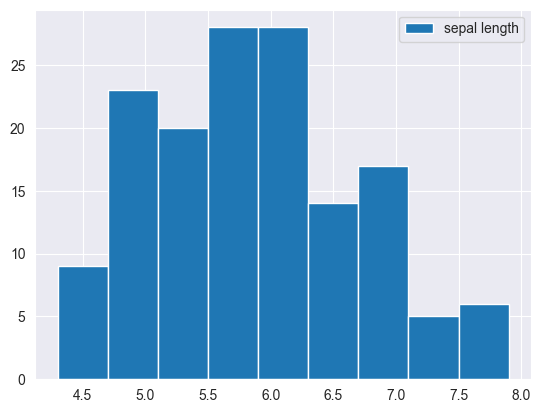

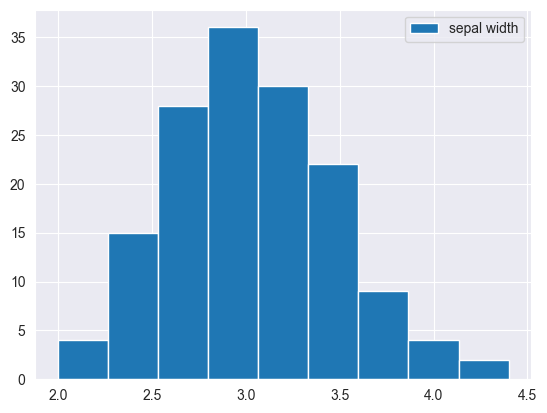

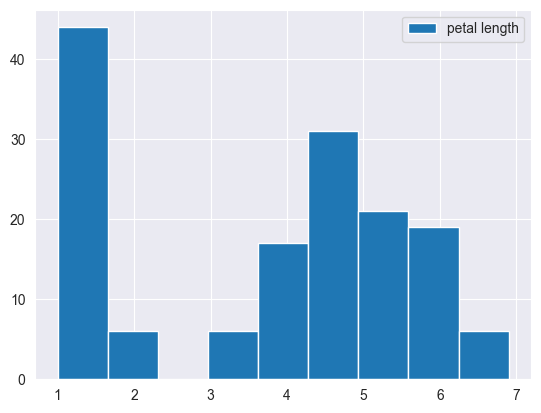

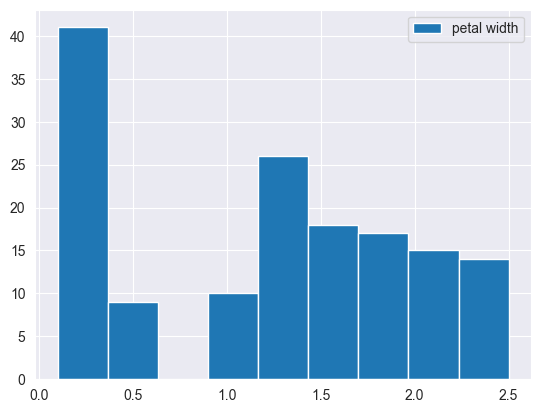

In [26]:
for name in names:
    X[name].hist(bins=9, label=name)
    plt.legend()
    plt.show()

Корреляция:

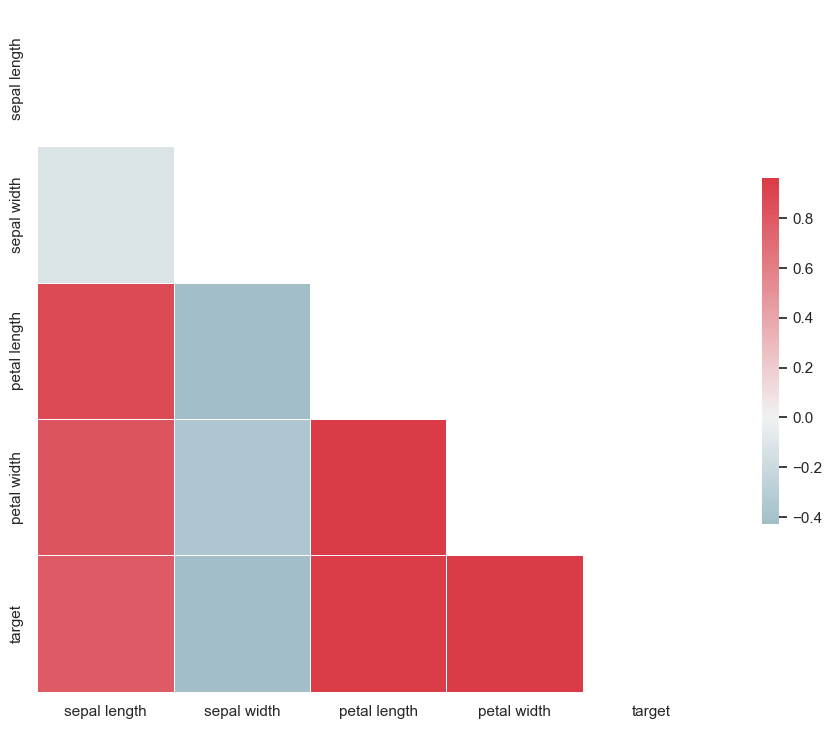

In [27]:
dt=pd.concat([X,pd.DataFrame(Y, columns=['target'])], axis=1)
sns.set(style="white")

# Compute the correlation matrix
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Еще несколько красивых графиков:

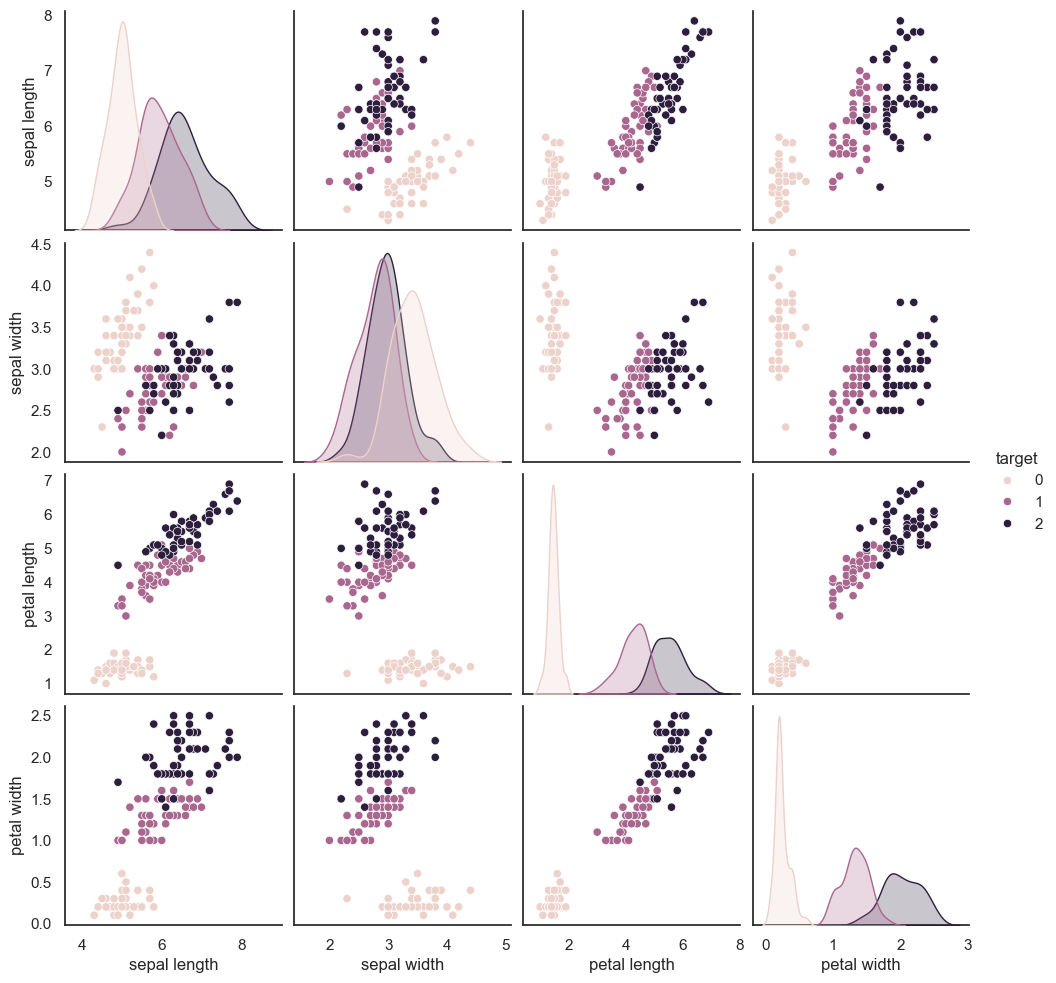

In [28]:
sns.pairplot(dt, kind='scatter', hue='target')
plt.show()

[]

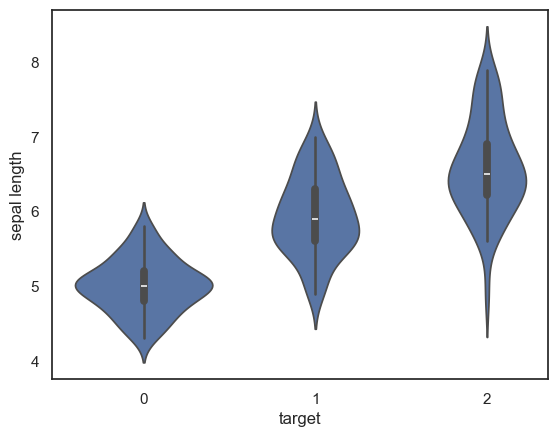

In [29]:
sns.violinplot( x=dt["target"], y=dt["sepal length"])
plt.plot()

Считаем ранг матрицы признаков:

In [30]:
np.linalg.matrix_rank(X)

np.int64(4)

In [31]:
#from sklearn import metrics
logit = sm.MNLogit(Y, X)
result = logit.fit()
preds=np.argmax(result.predict(X).values,axis=1)
accuracy_score(Y,preds)

         Current function value: 0.072266
         Iterations: 35


0.9666666666666667

**Logistic regression with L1 regularization**

In [32]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga').fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

0.98

**Logistic regression with L2 regularization**

In [33]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver='saga', fit_intercept=True).fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

0.9866666666666667

In [34]:
solvers=['newton-cg', 'sag', 'saga', 'lbfgs']
for solver in solvers:
    model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver=solver, fit_intercept=True).fit(X,Y)
    preds=model.predict(X)
    print(solver, accuracy_score(Y, preds))

newton-cg 0.9733333333333334
sag 0.9866666666666667
saga 0.9866666666666667
lbfgs 0.9733333333333334


### Анализируем результаты

**Визуальный анализ**

### **Задача 3**:
* постройте точечные диаграммы (scatter plots) любых двух признаков из X
    * a) используйте настоящие значения целевой переменной в качестве цветовой разметки
    * b) используйте предсказанные значения в качестве цветовой разметки
    
**Подсказка:** используйте sns.lmplot  

* найдите как минимум две неправильно классифицированные точки

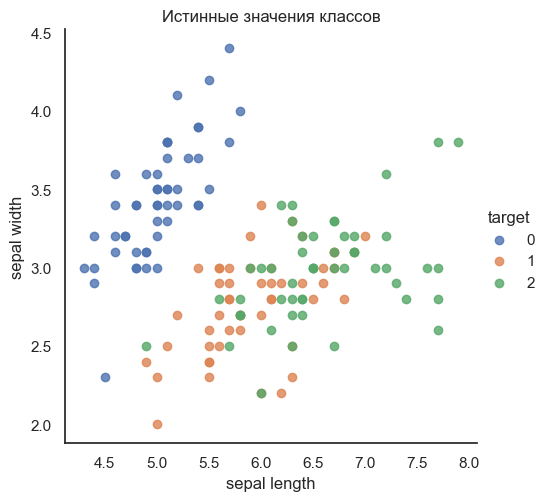

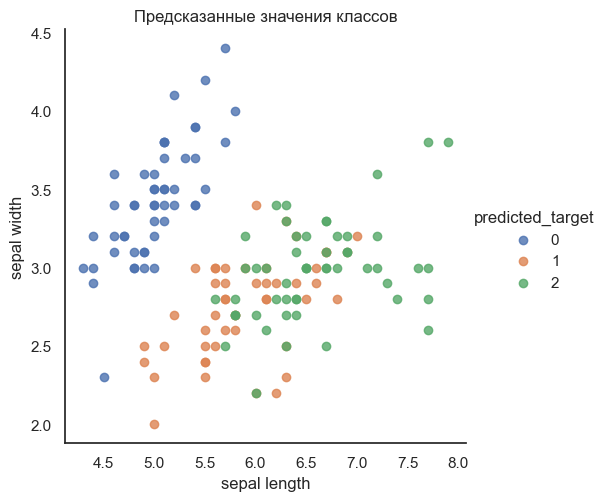

In [42]:
sns.lmplot(data=dt, x="sepal length", y="sepal width", hue="target", fit_reg=False)
plt.title("Истинные значения классов")
plt.show()

preds = model.predict(X)
dt['predicted_target'] = preds
sns.lmplot(data=dt, x="sepal length", y="sepal width", hue="predicted_target", fit_reg=False)
plt.title("Предсказанные значения классов")
plt.show()


### **Задача 4**:
* прочитайте про confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
* вычислите и нарисуйте ее (https://scikit-learn.org/0.20/auto_examples/model_selection/plot_confusion_matrix.html)

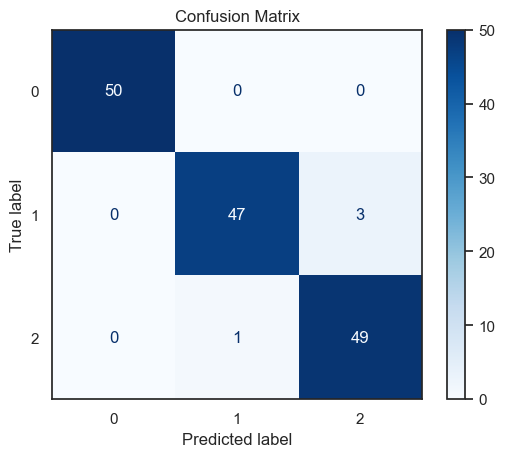

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(Y, preds)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


### **Задача 5**: Постройте (любую) модель логистической регрессии для двух классов: versicolor и virginica
* 0) постройте график парных зависимостей и сделайте цветовую разметку по значениям целевой переменной
* a) сформируйте новый датасет, соответствующий поставленной задаче (удалите все, что относится к классу setosa)
* b) постройте модель
* c) выведите на экран accuracy score

In [59]:
iris = pd.DataFrame(X)
iris['target'] = Y
iris = iris[iris['target'] != 0] 

X_binary = iris.drop('target', axis=1)
Y_binary = iris['target']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_binary, Y_binary, test_size=0.3, random_state=42)
model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train, Y_train)

preds_logistic = model_logistic.predict(X_test)
accuracy = accuracy_score(Y_test, preds_logistic)
print(f'Accuracy Score for Versicolor and Virginica classification: {accuracy:.2f}')


Accuracy Score for Versicolor and Virginica classification: 0.01
